In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

save_dir = Path("../data/wqp/metadata")
metadata = gpd.read_file(save_dir / "basin_polygons" / "metadata_basin_polygons.shp")

In [3]:
list(metadata)

['hybas',
 'n_bas_up',
 'area',
 'order',
 'n_turb',
 'min_turb',
 'range_turb',
 'n_sim_turb',
 'c_sim_turb',
 'n_obs_turb',
 'c_obs_turb',
 'n_red_turb',
 'c_red_turb',
 'n_nir_turb',
 'c_nir_turb',
 'n_ssc',
 'min_ssc',
 'range_ssc',
 'n_sim_ssc',
 'c_sim_ssc',
 'n_obs_ssc',
 'c_obs_ssc',
 'n_red_ssc',
 'c_red_ssc',
 'n_nir_ssc',
 'c_nir_ssc',
 'n_flux',
 'min_flux',
 'range_flux',
 'n_sim_flux',
 'c_sim_flux',
 'n_obs_flux',
 'c_obs_flux',
 'n_red_flux',
 'c_red_flux',
 'n_nir_flux',
 'c_nir_flux',
 'geometry']

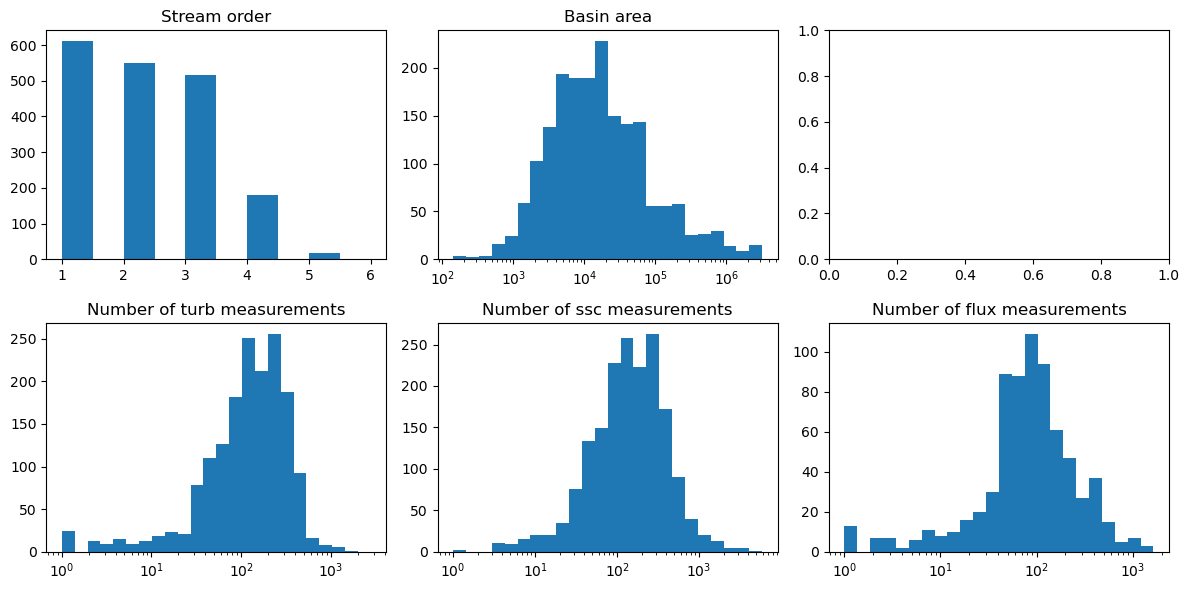

In [3]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

axes[0,0].hist(metadata["order"])
axes[0,0].set_title("Stream order")

bins = np.logspace(np.log10(min(metadata["area"])),np.log10(max(metadata["area"])), 25)
axes[0,1].hist(metadata["area"], bins=bins)
axes[0,1].set_xscale("log")
axes[0,1].set_title("Basin area")

targets = ["turb","ssc","flux"]
for i, target in enumerate(targets):
    bins = np.logspace(0,np.log10(max(metadata[f"n_{target}"])), 25)
    axes[1,i].hist(metadata[f"n_{target}"],bins=bins)
    axes[1,i].set_xscale("log")
    axes[1,i].set_title(f"Number of {target} measurements")


plt.tight_layout()
plt.show()


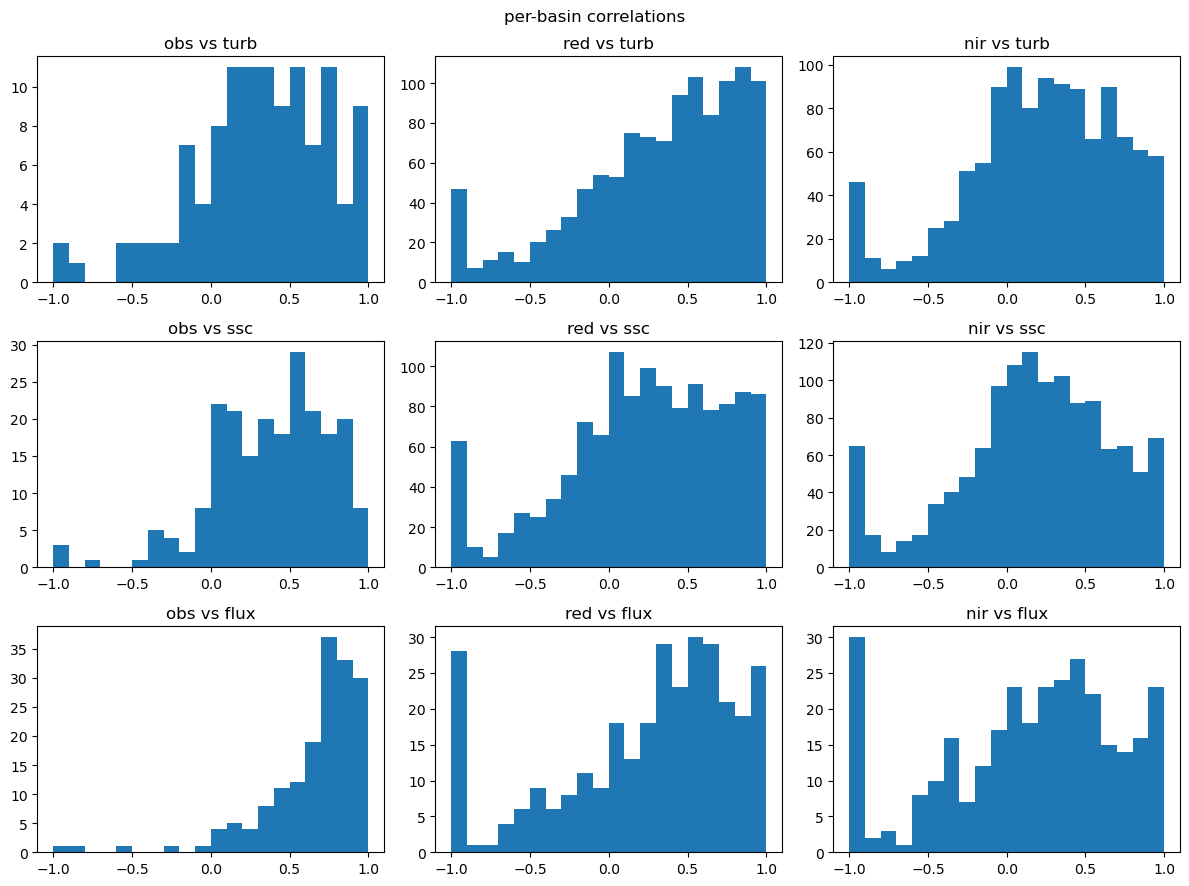

In [4]:
targets = ["turb","ssc","flux"]
features = ["obs","red","nir"]
bin_width = 0.1
bins = np.arange(-1,1+bin_width,bin_width)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))


# Loop through each combination of targets and features
for i, target in enumerate(targets):
    for j, feature in enumerate(features):
        axes[i, j].hist(metadata[f"c_{feature}_{target}"], bins=bins)
        axes[i, j].set_title(f"{feature} vs {target}")

plt.suptitle("per-basin correlations")
plt.tight_layout()
plt.show()


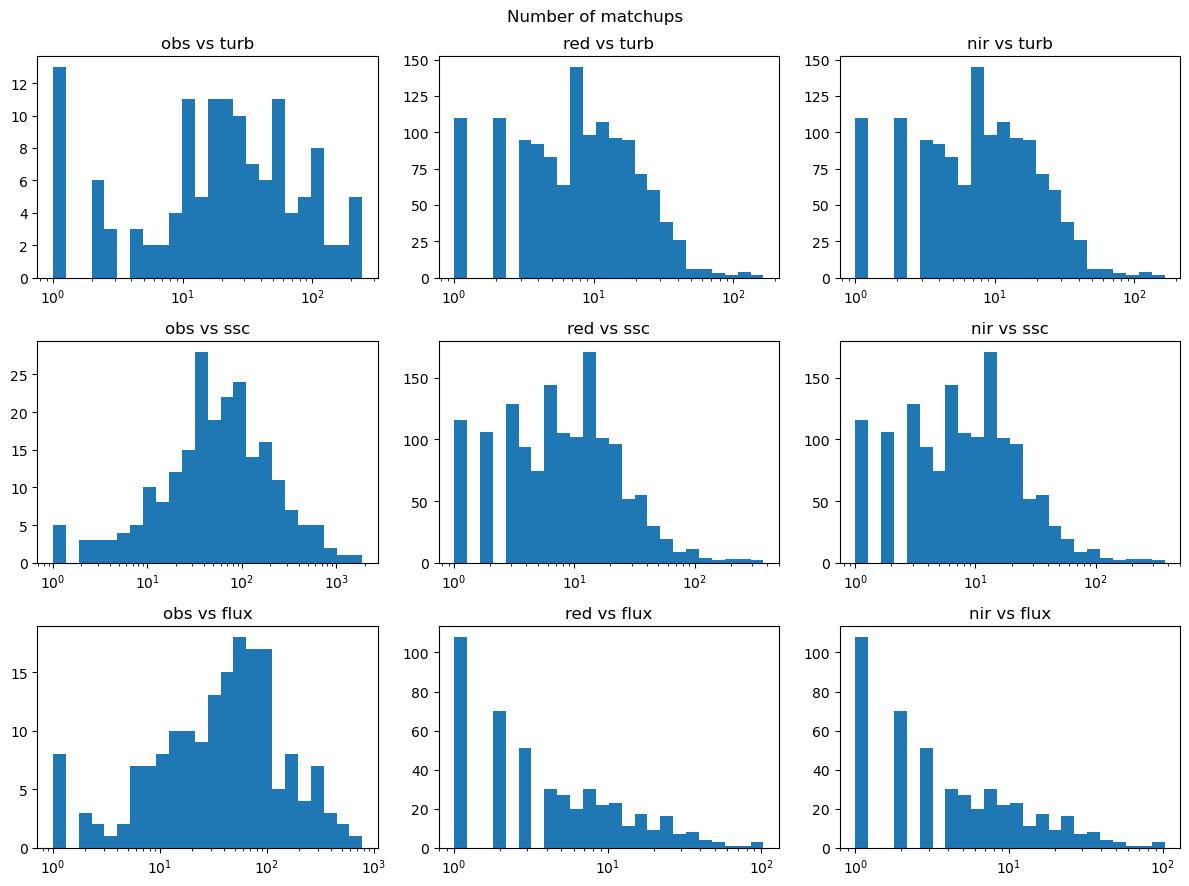

In [4]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 9))

# Loop through each combination of targets and features
for i, target in enumerate(targets):
    for j, feature in enumerate(features):
        bins = np.logspace(np.log10(1),np.log10(max(metadata[f"n_{feature}_{target}"])), 25)
        axes[i, j].hist(metadata[f"n_{feature}_{target}"], bins=bins)
        axes[i, j].set_title(f"{feature} vs {target}")
        axes[i, j].set_xscale("log")

plt.suptitle("Number of matchups")
plt.tight_layout()
plt.show()

In [6]:
save_dir

PosixPath('../data/wqp/metadata')

47
../data/wqp/metadata/site_lists/sites_ssc_area10000_n50.txt


<Axes: >

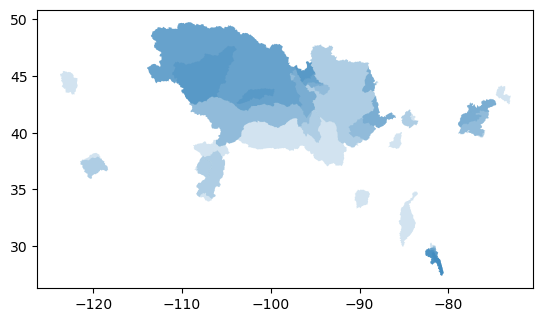

In [21]:
area = 10000 #km^2
feature = "ssc"
n_sat_obs = 50

mask = ((metadata["area"]>=area) & 
        (metadata[f"n_red_{feature}"]>= n_sat_obs))

print(np.sum(mask))
file_name = f"sites_{feature}_area{area}_n{n_sat_obs}.txt"
file_path = save_dir / "site_lists" / file_name
print(file_path)

# Save the Series to a text file with no delimiters or headers
# metadata.hybas[mask].to_csv(file_path, header=False, index=False)

metadata[mask].plot(alpha=0.2)

In [9]:
pwd

'/work/pi_kandread_umass_edu/neuralhydrology'